# CMPINF 0010: Best Neighborhood - Public School Enrollment
## Group member: Lingfeng Fan

Public school enrollment is one of our submetrics to determine which of neighborhoods in Pittsburgh is the best.

In this notebook, I'm using a dataset reflected public school enrollments for each neighborhood. This dataset specifically has a column of neighborhood, which helps me to effectively collect total_students_enrolled data for every neighborhood. 


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# load the data from csv
enrollments = pd.read_csv("neighborhood_enrollment.csv")
enrollments.head(10)
                            

,neighborhood,african_american,american_indian,asian__not_pacific_islander,hispanic,multiracial,native_hawaiian_or_other_pacific_islander,white,total_students_enrolled,student_count_redactions,attending_feeder,attending_nonfeeder,total_with_feeder_status,feeder_count_redactions,grade_level
0,Allegheny Center,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
1,Allegheny West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
2,Allentown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
3,Arlington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
4,Arlington Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,Pre-K
5,Banksville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
6,Bedford Dwellings,12.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,N,NaN,NaN,NaN,NaN,Pre-K
7,Beechview,NaN,NaN,NaN,13.0,NaN,NaN,19.0,44.0,Y,NaN,NaN,NaN,NaN,Pre-K
8,Beltzhoover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Pre-K
9,Bloomfield,NaN,NaN,NaN,NaN,NaN,NaN,16.0,21.0,Y,NaN,NaN,NaN,NaN,Pre-K


As we can tell based on the output from the previous cell, the data contains way too many unnecessary data attributes. Let's trim it before move forward.

In [4]:
# cut off all columns except for neighborhood, total_students_enrolled
enrollments_trim = enrollments[['neighborhood', 'total_students_enrolled' ]]
enrollments_trim.head(10)

,neighborhood,total_students_enrolled
0,Allegheny Center,NaN
1,Allegheny West,NaN
2,Allentown,NaN
3,Arlington,NaN
4,Arlington Heights,NaN
5,Banksville,NaN
6,Bedford Dwellings,12.0
7,Beechview,44.0
8,Beltzhoover,NaN
9,Bloomfield,21.0


After we trim the data, it only contains the columns of neighborhood and total students enrolled now. But unfortunately, there are some NaN values which is short of “Not a Number” (missing values). We need to deal with those values in order for data to be sorted before running further analysis. 

In [5]:
enrollments_trim['total_students_enrolled'] = enrollments_trim['total_students_enrolled'].fillna(0)

enrollments_trim.head(10)

<ipython-input-5-4aa7d73eadfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollments_trim['total_students_enrolled'] = enrollments_trim['total_students_enrolled'].fillna(0)


,neighborhood,total_students_enrolled
0,Allegheny Center,0.0
1,Allegheny West,0.0
2,Allentown,0.0
3,Arlington,0.0
4,Arlington Heights,0.0
5,Banksville,0.0
6,Bedford Dwellings,12.0
7,Beechview,44.0
8,Beltzhoover,0.0
9,Bloomfield,21.0


In [6]:
enrollments_trim = enrollments_trim.sort_values('total_students_enrolled', ascending=False)
enrollments_trim.head(10)

,neighborhood,total_students_enrolled
107,Carrick,541.0
105,Brookline,526.0
286,Carrick,378.0
99,Beechview,339.0
284,Brookline,310.0
104,Brighton Heights,296.0
197,Carrick,293.0
168,Squirrel Hill South,286.0
131,Homewood North,282.0
195,Brookline,276.0


Now we have our new data with descending order, so we can clearly tell which neighborhoods have more students enrolled in public schools. Let's visualize our data with bar diagram.

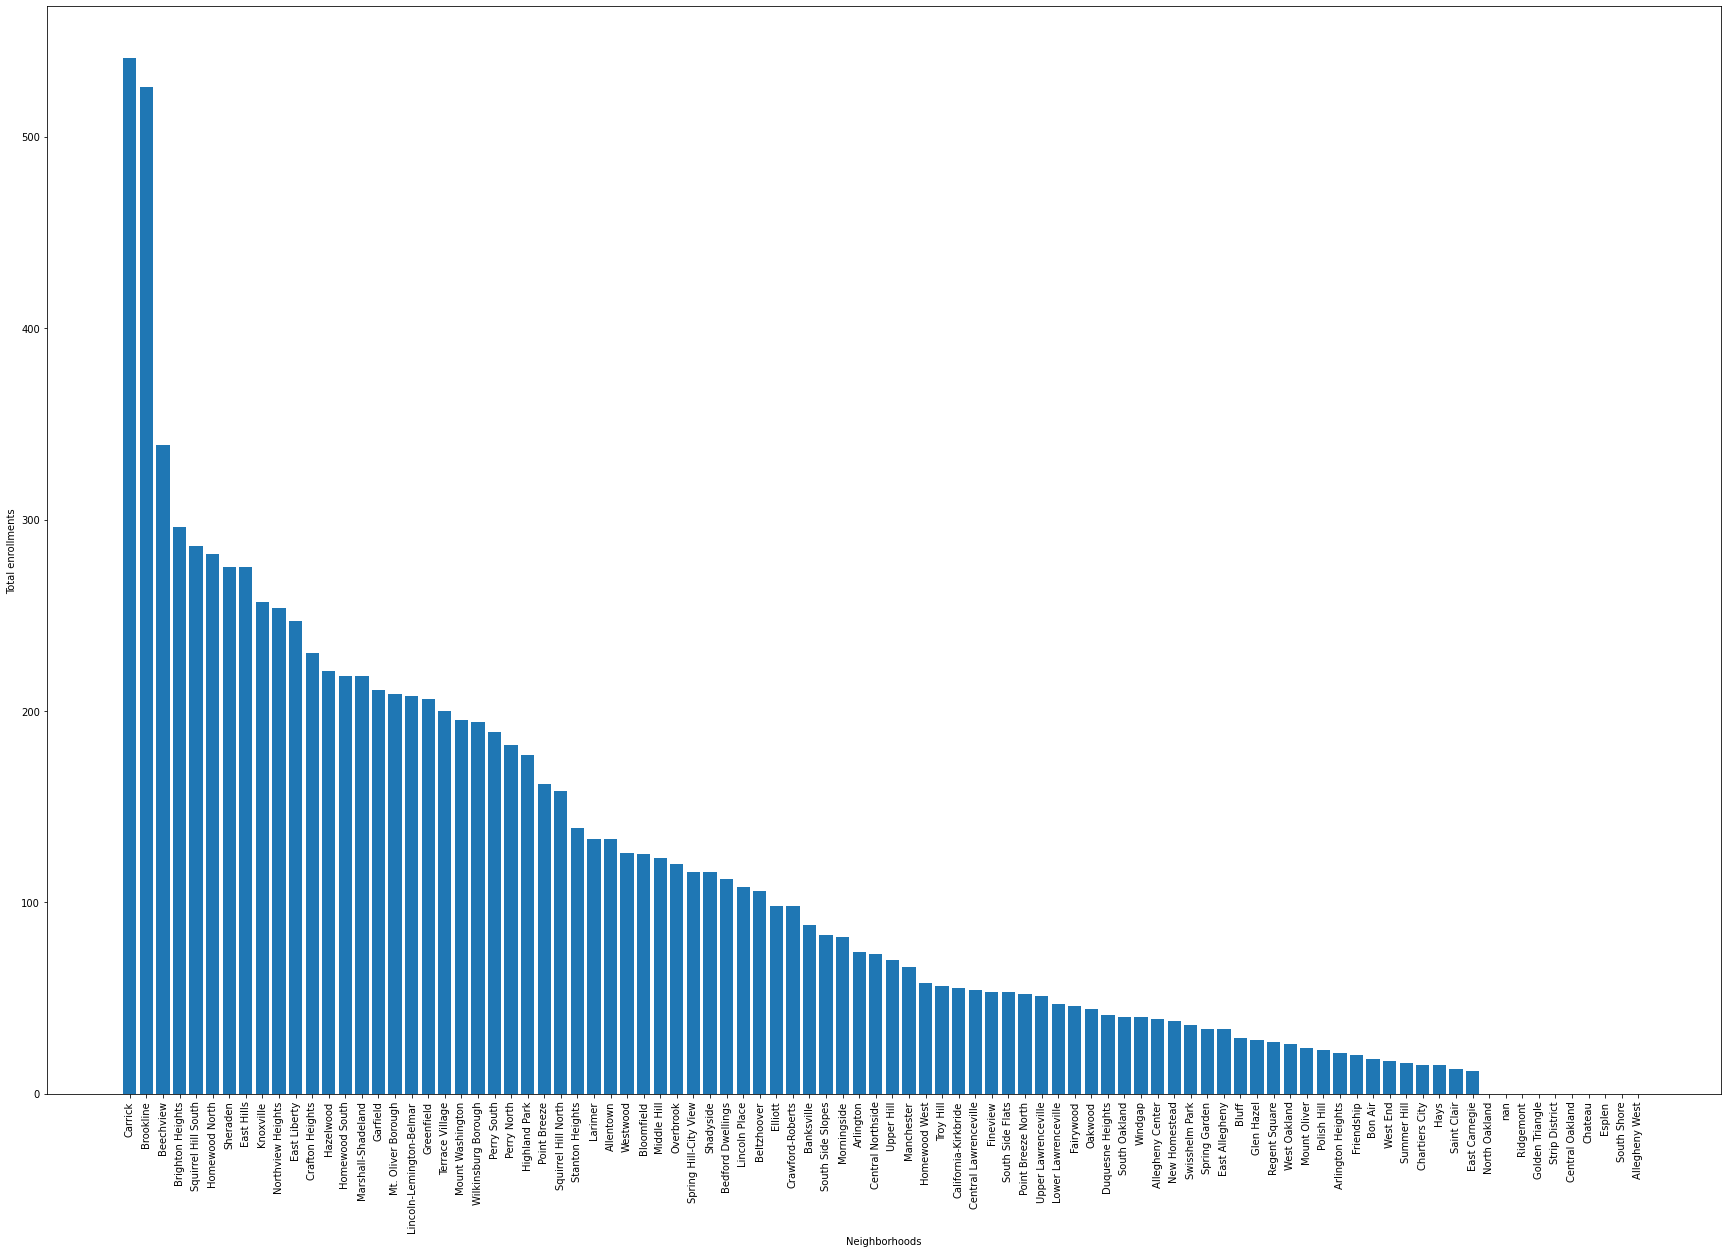

In [25]:
# draw the bar diagram

# enrollments_trim.plot(x='neighborhood',y='total_students_enrolled', kind='bar', rot=90, figsize = (40,30))

neighborhood= enrollments_trim['neighborhood'].astype(str);
total_students_enrolled= enrollments_trim['total_students_enrolled'].astype(int);

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(20)

plt.bar(neighborhood, total_students_enrolled);

plt.xticks(rotation ='vertical')

plt.xlabel('Neighborhoods')
plt.ylabel('Total enrollments')

plt.show()



Now we have a rough bar diagram, but it is defintely not beautiful enough. Let's make it elegant by only displaying the neighborhoods with total public school enrollments above 200.

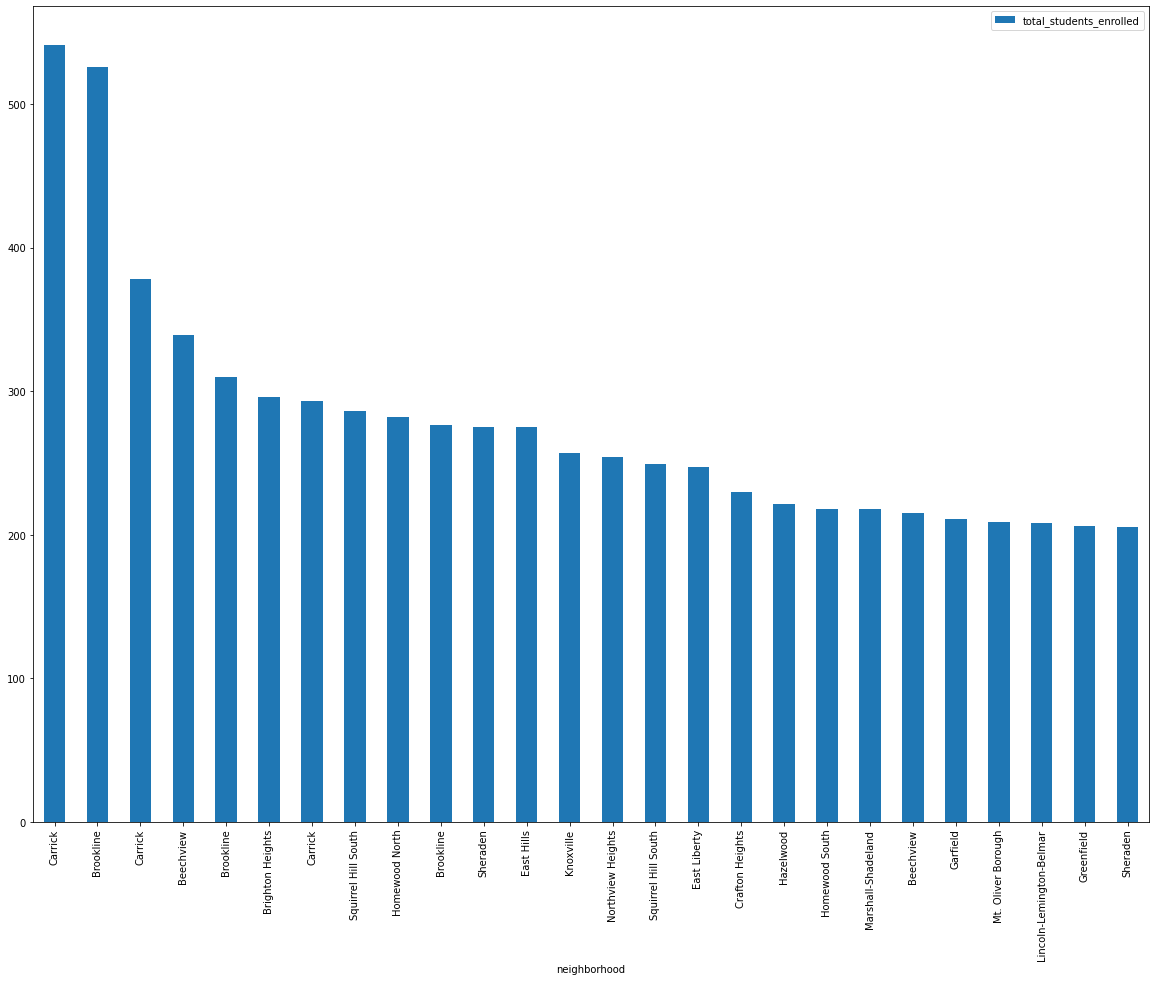

In [37]:
enrollments_bar = enrollments_trim[enrollments_trim['total_students_enrolled']>200]

enrollments_bar.plot(x='neighborhood',y='total_students_enrolled', kind='bar', rot=90, figsize = (20,15))

## Summary

As we can tell from the above statistics and dar diagram, Carrick neighborhood has the highest public school enrollments, so Carrick wins this round! However, the above analysis is not comprehensive for sure, because first of all, it is based on a dataset from 2021, which is outdated as this point; second, this dataset only collects information about public schools, which means plenty of private schools are not counted towards our analysis; last, the public school enrollments is not the exclusive standard to determine the best neighborhood, and the anaylsis itself is subjective. Therefore, we need to combine more factors to make our answer more convincing.

